In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def random_lattice(n):
    """Construct a random spin configuration for an nxn lattice."""
    vector = np.random.rand(n,n)
    vector[vector < 0.5] = -1
    vector[vector > 0.4] = 1
    return vector

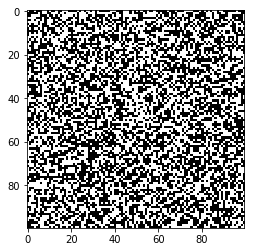

In [7]:
plt.imshow(random_lattice(100),cmap='gray')
plt.show()

In [8]:
def lattice_energy(L):
    """Computer the energy of the spin configuration corresponding to the
    lattice L.
    """
    return np.sum(np.roll(L,axis=1,shift=1)*L) + np.sum(np.roll(L,axis=0,shift=1)*L)

In [50]:
def flip_location(n):
    """Choose a random pair of indices 0 <= i,j <= n-1."""
    return np.random.randint(n),np.random.randint(n)

In [60]:
def updated_energy(L, L_energy, i, j):
    """Compute the energy of the spin configuration that results
    when the (i,j)th spin of L is flipped.
    """
    n = len(L)
    return L_energy + 2*L[i,j]*(L[i,(j+1)%n]+L[(i+1)%n,j]+L[i,j-1]+L[i-1,j])

In [54]:
def accept(beta, energy_old, energy_new):
    """Accept or reject the new spin configuration."""
    a = np.random.rand(1)
    if energy_new < energy_old:
        return a <= 1
    return a <= np.exp(beta*(energy_old-energy_new))

In [69]:
def ising_metropolis(beta, n=100, n_samples=5000, burn_in=195000):
    """Use the Metropolis algorithm to choose new spin configurations.

    Parameters:
        beta (float > 0): Constant inversely proportional to the temperature.
        N (int > 0): The size of the lattice.
        n_samples (int): The number of samples to generate.
        burnin (int): The number of iterations to burn before sampling.

    Returns:
        ((n_samples//100, n,n) ndarray): The sampled spin configurations.
        (n_samples) ndarray: The weighted energies of each configuration.
        (float): The proportion of proposed samples that were accepted.
    """
    L = random_lattice(n)
    old_energy = lattice_energy(L)
    tracking = []
    states = []
    for k in range(burn_in):
        i,j = flip_location(n)
        new_energy = updated_energy(L, old_energy, i, j)
        if accept(beta,old_energy,new_energy):
            L[i,j] = -L[i,j]
            old_energy = new_energy
        tracking.append(-beta*old_energy)
        
    for k in range(n_samples):
        i,j = flip_location(n)
        new_energy = updated_energy(L, old_energy, i, j)
        if accept(beta,old_energy,new_energy):
            L[i,j] = -L[i,j]
            old_energy = new_energy
        tracking.append(-beta*old_energy)
        if k % 100 == 0:
            states.append(L)
    return tracking,states

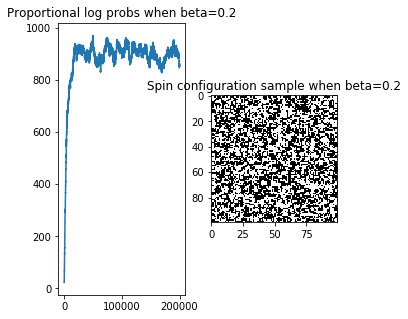

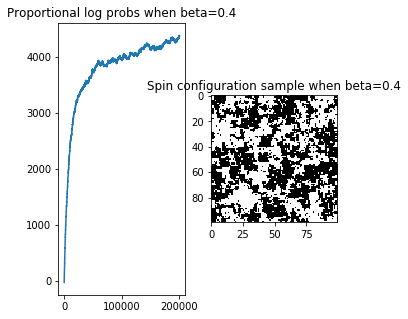

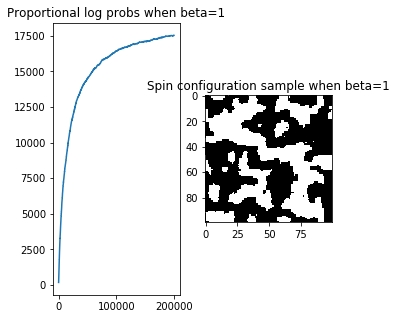

In [76]:
for b in [.2,.4,1]:
    fig = plt.figure(figsize=(5,5))
    plt.subplot(121)
    plt.title("Proportional log probs when beta={}".format(b))
    t,a = ising_metropolis(b)
    plt.plot(t)
    plt.subplot(122)
    plt.title("Spin configuration sample when beta={}".format(b))
    plt.imshow(a[-1],cmap='gray')
    plt.show()